In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Maximum per channel

In [2]:
FILE_NAME = "Ntuple_runsampic_166_runtelescope_643.npz"
channel_events = np.load(f'../data/{FILE_NAME}', allow_pickle=True)['arr_0'].flat[0]

In [3]:
def plot_channel_events_histograms(channel_events, ylim=True):
    for channel, events in list(channel_events.items()):
        print(f"Number of events: {len(events['eventIDSampic'])}")
        plt.figure(figsize=(16, 6))
        
        ampl_data = np.array(events['sample_ampl'])

        plt.subplot(1, 2, 1)
        X = np.max(ampl_data[:, 0], axis=1)
        counts, bins, _ = plt.hist(X, bins=100, range=(0, 1))
        plt.title('Channel 0')
        plt.xlim(-0.05, 1.05)
        if ylim:
            plt.ylim(0, np.max(counts) + 50)

        plt.subplot(1, 2, 2)
        X = np.max(ampl_data[:, 1], axis=1)
        plt.hist(X, bins=100, range=(0, 1))
        plt.title(f'Channel {channel}')
        plt.xlim(-0.05, 1.05)
        if ylim:
            plt.ylim(0, np.max(counts) + 50)

        plt.show()

Number of events: 19578


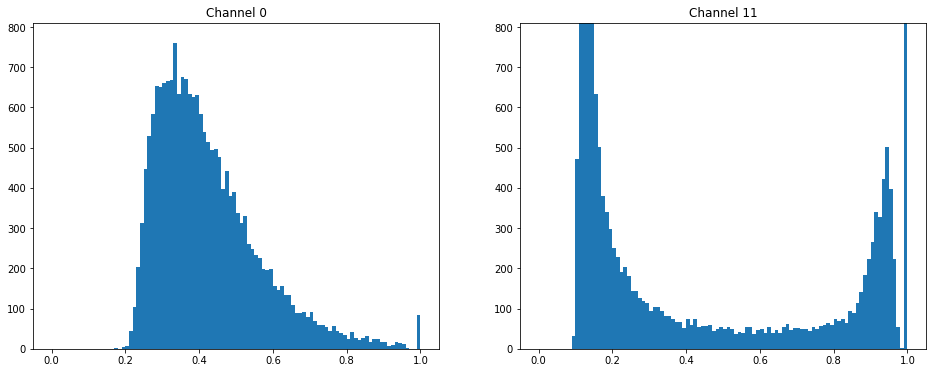

Number of events: 15730


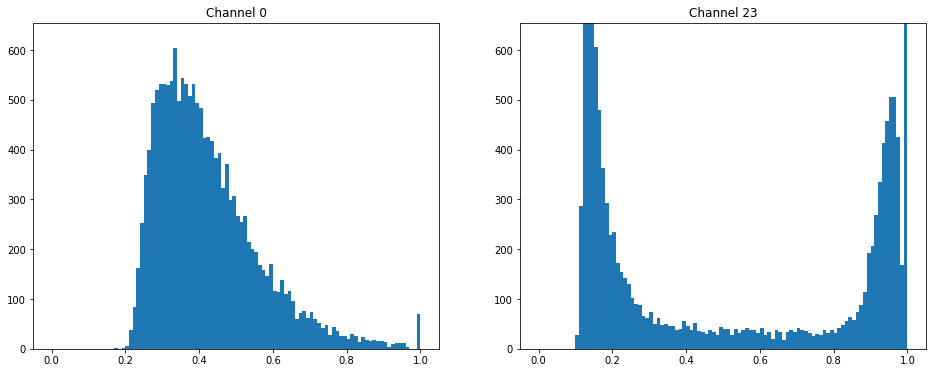

Number of events: 15025


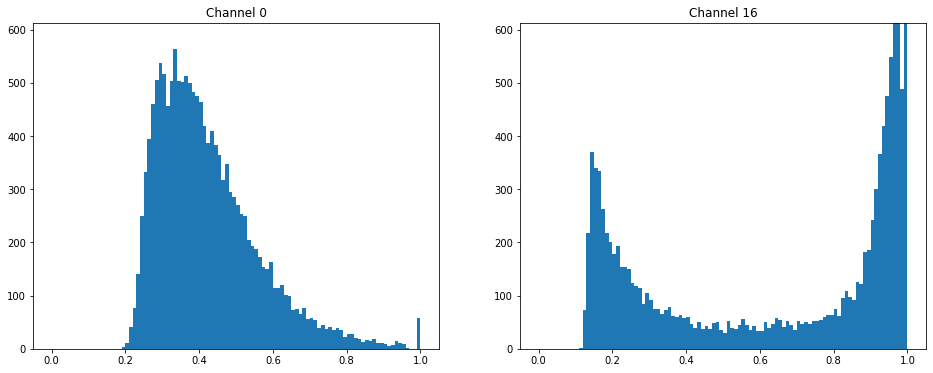

Number of events: 13421


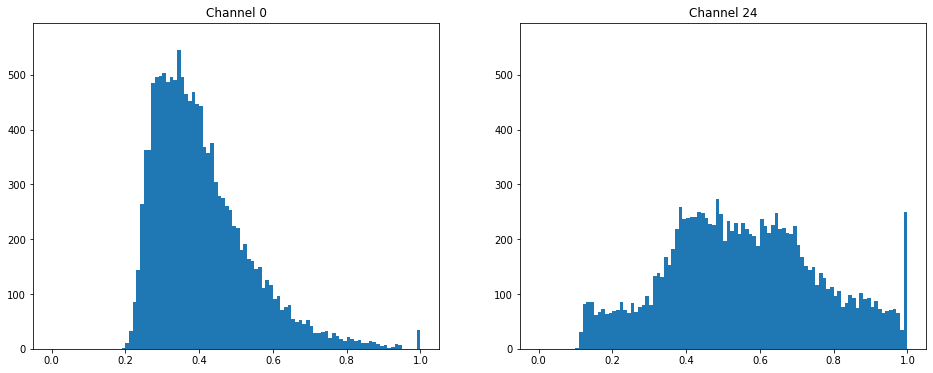

Number of events: 12204


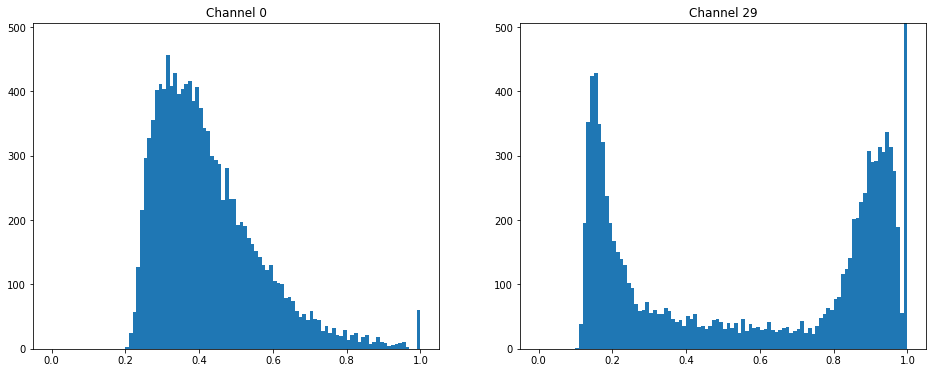

Number of events: 11913


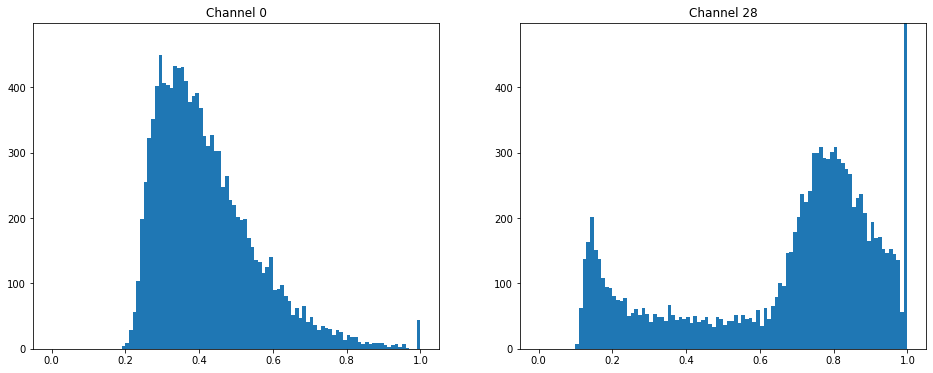

Number of events: 11702


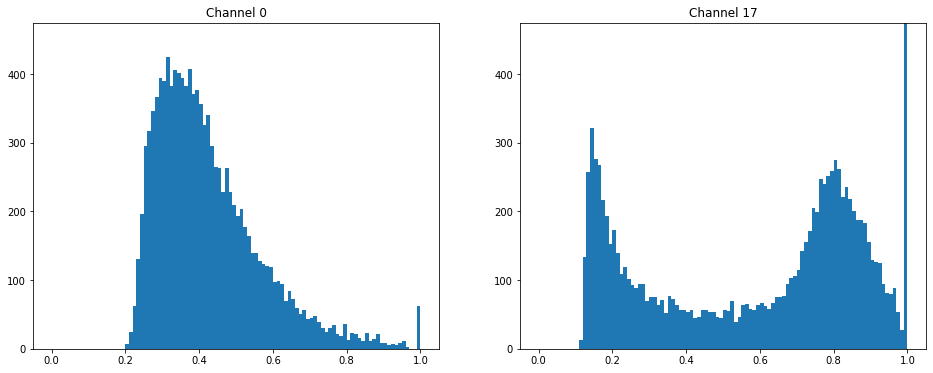

Number of events: 11052


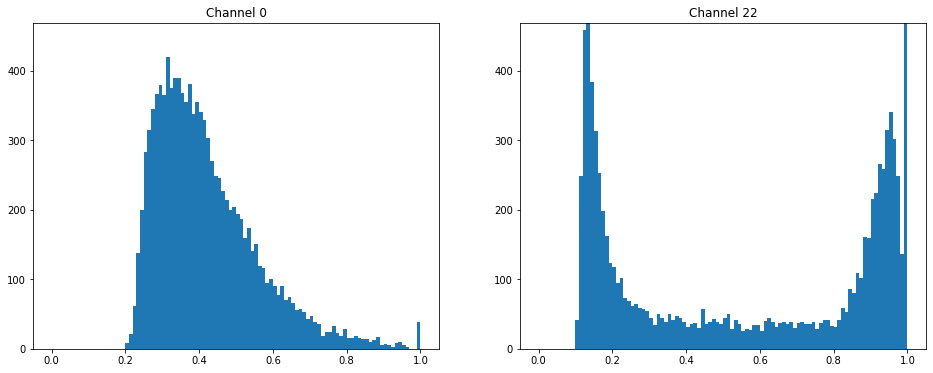

Number of events: 10752


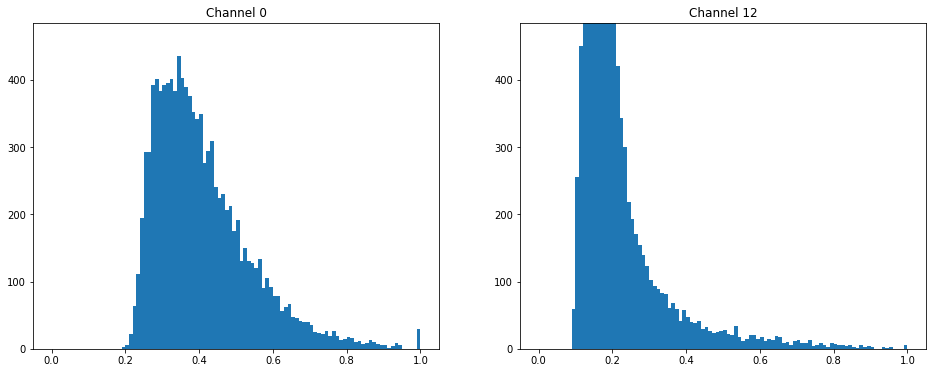

Number of events: 10462


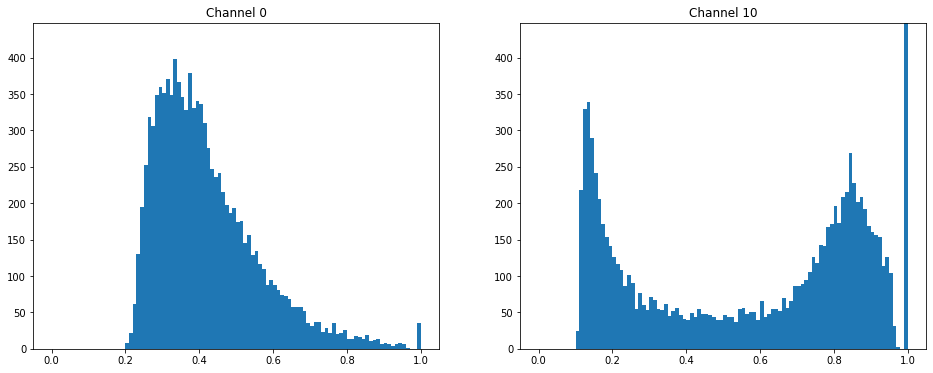

In [4]:
plot_channel_events_histograms(channel_events)

# Choose the best channel

In [5]:
best_channel = 17
best_channel_events = {best_channel: channel_events[best_channel]}

Number of events: 11702


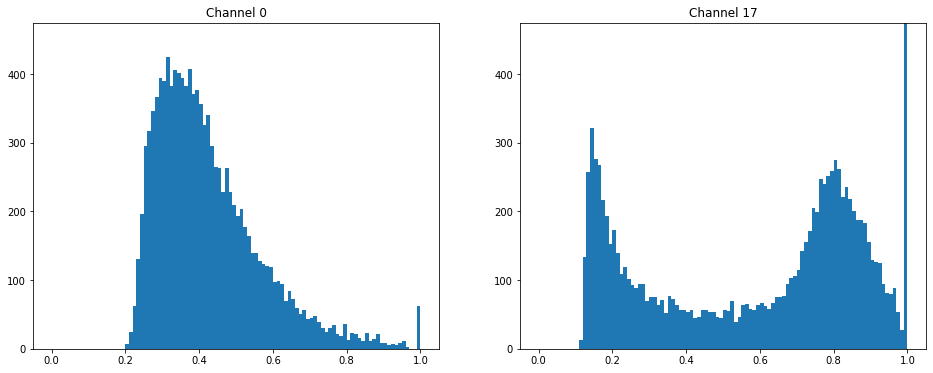

In [6]:
plot_channel_events_histograms(best_channel_events)

# Filter wrong events

In [7]:
def filter_channel_events(channel_events, th_ch_min, th_ch_max, th_0_min=0.2, th_0_max=0.95):
    filtered_channel_events = {}
    for channel, events in channel_events.items():
        filtered_channel_events[channel] = {}
        
        ampl_data = np.array(events['sample_ampl'])
        max_ampl = np.array(ampl_data.max(axis=2))

        ch_0_mask = np.logical_and(max_ampl[:, 0] >= th_0_min, max_ampl[:, 0] <= th_0_max)
        ch_ch_mask = np.logical_and(max_ampl[:, 1] >= th_ch_min, max_ampl[:, 1] <= th_ch_max)
        mask = np.logical_and(ch_0_mask, ch_ch_mask)
        
        for key, arr in events.items():
            filtered_channel_events[channel][key] = np.array(arr)[mask]
        
    return filtered_channel_events

filtered_channel_events = filter_channel_events(best_channel_events, th_ch_min=0.6, th_ch_max=0.98)
# filtered_channel_events = filter_channel_events(best_channel_events, th_ch_min=0.0, th_ch_max=1.0, th_0_min=0.99, th_0_max=1.0)

Number of events: 5639


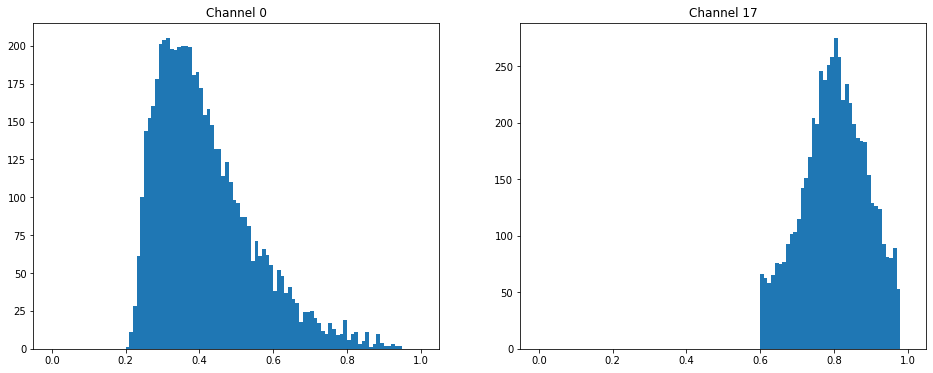

In [8]:
plot_channel_events_histograms(filtered_channel_events, ylim=False)

In [9]:
np.savez_compressed(f'../data/{FILE_NAME[:-4]}_filtered.npz', filtered_channel_events)

In [10]:
loaded_filtered_channel_events = np.load(f'../data/{FILE_NAME[:-4]}_filtered.npz', allow_pickle=True)['arr_0'].flat[0]
loaded_filtered_channel_events.keys()

dict_keys([17])

In [11]:
loaded_filtered_channel_events[best_channel].keys()

dict_keys(['sample_t0', 'sample_channel', 'eventIDSampic', 'sample_ampl'])